# Introduction to Statistics in Python

## Summary Statistics

### Mean and median

In this chapter, you'll be working with the [2018 Food Carbon Footprint
Index](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018)
from nu3. The `food_consumption` dataset contains information about the
kilograms of food consumed per person per year in each country in each
food category (`consumption`) as well as information about the carbon
footprint of that food category (`co2_emissions`) measured in kilograms
of carbon dioxide, or CO<sub>2</sub>, per person per year in each
country.

In this exercise, you'll compute measures of center to compare food
consumption in the US and Belgium using your `pandas` and `numpy`
skills.

`pandas` is imported as `pd` for you and `food_consumption` is
pre-loaded.

**Instructions**

- Import `numpy` with the alias `np`.
- Create two DataFrames: one that holds the rows of `food_consumption`
  for `'Belgium'` and another that holds rows for `'USA'`. Call these
  `be_consumption` and `usa_consumption`.
- Calculate the mean and median of kilograms of food consumed per person
  per year for both countries.

<!-- -->

- Subset `food_consumption` for rows with data about Belgium and the
  USA.
- Group the subsetted data by `country` and select only the
  `consumption` column.
- Calculate the mean and median of the kilograms of food consumed per
  person per year in each country using `.agg()`.

**Answer**


In [4]:
pip install numpy pandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
# edited/added
import pandas as pd
food_consumption = pd.read_csv("food_consumption.csv")

In [12]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [13]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


/tmp/ipykernel_2272/2502747405.py:8: FutureWarning: The provided callable <function mean at 0xffff937ddee0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))
/tmp/ipykernel_2272/2502747405.py:8: FutureWarning: The provided callable <function median at 0xffff902391c0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))


### Mean vs. median

In the video, you learned that the mean is the sum of all the data
points divided by the total number of data points, and the median is the
middle value of the dataset where 50% of the data is less than the
median, and 50% of the data is greater than the median. In this
exercise, you'll compare these two measures of center.

`pandas` is loaded as `pd`, `numpy` is loaded as `np`, and
`food_consumption` is available.

**Instructions**

- Import `matplotlib.pyplot` with the alias `plt`.
- Subset `food_consumption` to get the rows where `food_category` is
  `'rice'`.
- Create a histogram of `co2_emission` for rice and show the plot.
- Use `.agg()` to calculate the mean and median of `co2_emission` for rice.


**Answer**


In [15]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 14.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


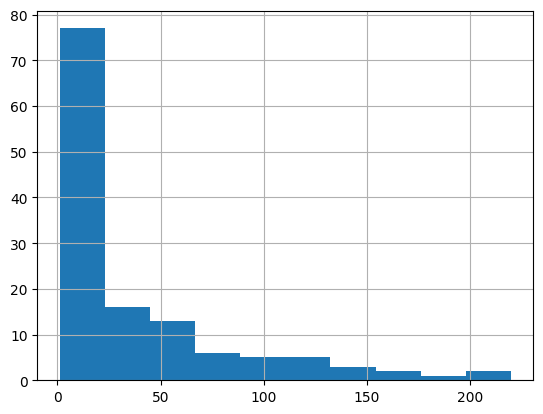

In [21]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

In [22]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


/tmp/ipykernel_2272/4138787908.py:5: FutureWarning: The provided callable <function mean at 0xffff937ddee0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(rice_consumption['co2_emission'].agg([np.mean, np.median]))
/tmp/ipykernel_2272/4138787908.py:5: FutureWarning: The provided callable <function median at 0xffff902391c0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(rice_consumption['co2_emission'].agg([np.mean, np.median]))


### Quartiles, quantiles, and quintiles

Quantiles are a great way of summarizing numerical data since they can
be used to measure center and spread, as well as to get a sense of where
a data point stands in relation to the rest of the data set. For
example, you might want to give a discount to the 10% most active users
on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles,
which split up a dataset into 4, 5, and 10 pieces, respectively.

Both `pandas` as `pd` and `numpy` as `np` are loaded and
`food_consumption` is available.

**Instructions**

- Calculate the quartiles of the `co2_emission` column of
  `food_consumption`.

<!-- -->

- Calculate the six quantiles that split up the data into 5 pieces
  (quintiles) of the `co2_emission` column of `food_consumption`.

<!-- -->

- Calculate the eleven quantiles of `co2_emission` that split up the
  data into ten pieces (deciles).

**Answer**


In [23]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation

Variance and standard deviation are two of the most common ways to
measure the spread of a variable, and you'll practice calculating these
in this exercise. Spread is important since it can help inform
expectations. For example, if a salesperson sells a mean of 20 products
a day, but has a standard deviation of 10 products, there will probably
be days where they sell 40 products, but also days where they only sell
one or two. Information like this is important, especially when making
predictions.

Both `pandas` as `pd` and `numpy` as `np` are loaded, and
`food_consumption` is available.

**Instructions**

- Calculate the variance and standard deviation of `co2_emission` for
  each `food_category` by grouping and aggregating.
- Import `matplotlib.pyplot` with alias `plt`.
- Create a histogram of `co2_emission` for the `beef` `food_category`
  and show the plot.
- Create a histogram of `co2_emission` for the `eggs` `food_category`
  and show the plot.

**Answer**


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


/tmp/ipykernel_2272/2113282346.py:2: FutureWarning: The provided callable <function var at 0xffff937de160> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
/tmp/ipykernel_2272/2113282346.py:2: FutureWarning: The provided callable <function std at 0xffff937de020> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))


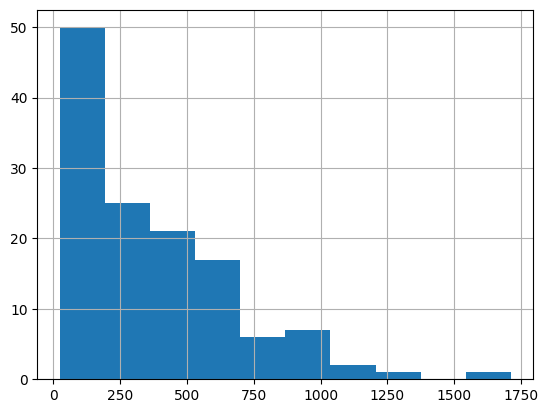

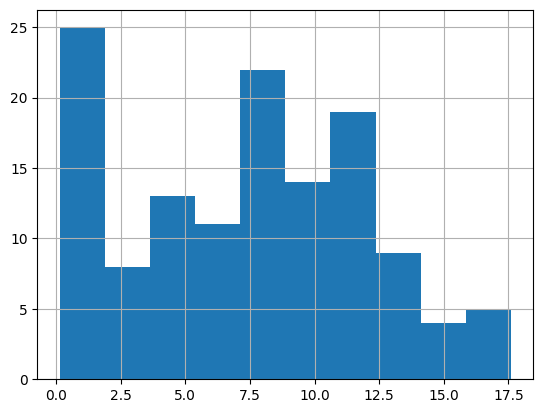

In [24]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

### Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as
statistics that rely on the mean, such as variance and standard
deviation. Interquartile range, or IQR, is another way of measuring
spread that's less influenced by outliers. IQR is also often used to
find outliers. If a value is less than \\\text{Q1} - 1.5 \times
\text{IQR}\\ or greater than \\\text{Q3} + 1.5 \times \text{IQR}\\, it's
considered an outlier. In fact, this is how the lengths of the whiskers
in a `matplotlib` box plot are calculated.

![Diagram of a box plot showing median, quartiles, and
outliers](https://assets.datacamp.com/production/repositories/5758/datasets/ca7e6e1832be7ec1842f62891815a9b0488efa83/Screen%20Shot%202020-04-28%20at%2010.04.54%20AM.png)

In this exercise, you'll calculate IQR and use it to find some outliers.
`pandas` as `pd` and `numpy` as `np` are loaded and `food_consumption`
is available.

**Instructions**

- Calculate the total `co2_emission` per country by grouping by country
  and taking the sum of `co2_emission`. Store the resulting DataFrame as
  `emissions_by_country`.
- Compute the first and third quartiles of `emissions_by_country` and store these as `q1` and `q3`.
- Calculate the interquartile range of `emissions_by_country` and store it as `iqr`.
- Calculate the lower and upper cutoffs for outliers of `emissions_by_country`, and store these as lower and `upper`.
- Subset `emissions_by_country` to get countries with a total emission greater than the `upper` cutoff or a total emission less than the `lower` cutoff.

**Answer**


In [29]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [30]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## Random Numbers and Probability

### Calculating probabilities

You're in charge of the sales team, and it's time for performance
reviews, starting with Amir. As part of the review, you want to randomly
select a few of the deals that he's worked on over the past year so that
you can look at them more deeply. Before you start selecting deals,
you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by \$\$
P(\text{event}) = \frac{\text{# ways event can happen}}{\text{total \#
of possible outcomes}} \$\$

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is
available.

**Instructions**

- Count the number of deals Amir worked on for each `product` type and
  store in `counts`.
- Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.


**Answer**


In [36]:
# edited/added
amir_deals = pd.read_csv("amir_deals.csv")

In [37]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [38]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


### Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's
time to randomly pick five deals so that you can reach out to each
customer and ask if they were satisfied with the service they received.
You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it
can be reproduced in case you get asked how you chose the deals, so
you'll need to set the random seed before sampling from the deals.

Both `pandas` as `pd` and `numpy` as `np` are loaded and `amir_deals` is
available.

**Instructions**

- Set the random seed to `24`.
- Take a sample of `5` deals **without** replacement and store them as
  `sample_without_replacement`.
- Take a sample of 5 deals with replacement and save as `sample_with_replacement`.


**Answer**


In [41]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [42]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


### Creating a probability distribution

A new restaurant opened a few months ago, and the restaurant's
management wants to optimize its seating space based on the size of the
groups that come most often. On one night, there are 10 groups of people
waiting to be seated at the restaurant, but instead of being called in
the order they arrived, they will be called randomly. In this exercise,
you'll investigate the probability of groups of different sizes getting
picked first. Data on each of the ten groups is contained in the
`restaurant_groups` DataFrame.

Remember that expected value can be calculated by multiplying each
possible outcome with its corresponding probability and taking the sum.
The `restaurant_groups` data is available. `pandas` is loaded as `pd`,
`numpy` is loaded as `np`, and `matplotlib.pyplot` is loaded as `plt`.

**Instructions**

- Create a histogram of the `group_size` column of `restaurant_groups`,
  setting `bins` to `[2, 3, 4, 5, 6]`. Remember to show the plot.

<!-- -->

- Count the number of each `group_size` in `restaurant_groups`, then
  divide by the number of rows in `restaurant_groups` to calculate the
  probability of randomly selecting a group of each size. Save as
  `size_dist`.
- Reset the index of `size_dist`.
- Rename the columns of `size_dist` to `group_size` and `prob`.

<!-- -->

- Calculate the expected value of the `size_dist`, which represents the
  expected group size, by multiplying the `group_size` by the `prob` and
  taking the sum.

<!-- -->

- Calculate the probability of randomly picking a group of 4 or more
  people by subsetting for groups of size 4 or more and summing the
  probabilities of selecting those groups.

**Answer**


In [46]:
# edited/added
restaurant_groups = pd.read_csv("restaurant_groups.csv")

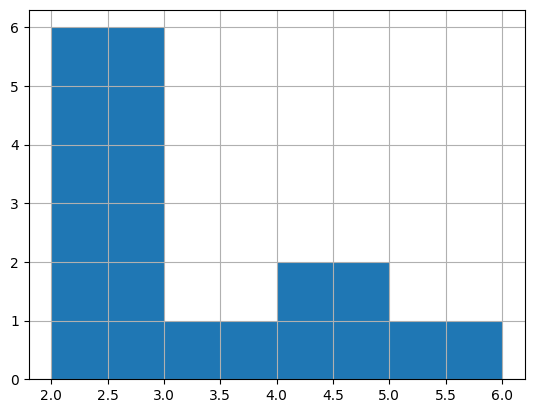

In [47]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=np.linspace(2,6,5))
plt.show()

In [151]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)


# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)


# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
2.9000000000000004
0.30000000000000004


### Data back-ups

The sales software used at your company is set to automatically back
itself up, but no one knows exactly what time the back-ups happen. It is
known, however, that back-ups happen exactly every 30 minutes. Amir
comes back from sales meetings at random times to update the data on the
client he just met with. He wants to know how long he'll have to wait
for his newly-entered data to get backed up. Use your new knowledge of
continuous uniform distributions to model this situation and answer
Amir's questions.

**Instructions**

- To model how long Amir will wait for a back-up using a continuous
  uniform distribution, save his lowest possible wait time as `min_time`
  and his longest possible wait time as `max_time`. Remember that
  back-ups happen every 30 minutes.

<!-- -->

- Import `uniform` from `scipy.stats` and calculate the probability that
  Amir has to wait less than 5 minutes, and store in a variable called
  `prob_less_than_5`.

<!-- -->

- Calculate the probability that Amir has to wait more than 5 minutes,
  and store in a variable called `prob_greater_than_5`.

<!-- -->

- Calculate the probability that Amir has to wait between 10 and 20
  minutes, and store in a variable called `prob_between_10_and_20`.

**Answer**


In [58]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.1/113.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 2.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [142]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)


# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)


# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


### Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll
simulate Amir waiting 1000 times and create a histogram to show him what
he should expect. Recall from the last exercise that his minimum wait
time is 0 minutes and his maximum wait time is 30 minutes.

As usual, `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as
`plt` are loaded.

**Instructions**

- Set the random seed to `334`.
- Import `uniform` from `scipy.stats`.
- Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as `wait_times`.
- Create a histogram of the simulated wait times and show the plot.

**Answer**


In [143]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

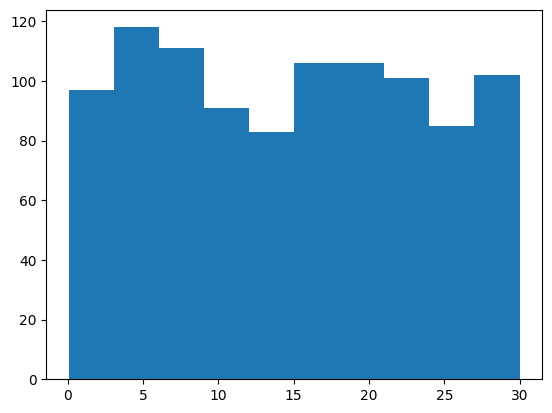

In [144]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

### Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins
30% of deals he works on. Each deal has a binary outcome: it's either
lost, or won, so you can model his sales deals with a binomial
distribution. In this exercise, you'll help Amir simulate a year's worth
of his deals so he can better understand his performance.

`numpy` is imported as `np`.

**Instructions**

- Import `binom` from `scipy.stats` and set the random seed to 10.

<!-- -->

- Simulate 1 deal worked on by Amir, who wins 30% of the deals he works
  on.

<!-- -->

- Simulate a typical week of Amir's deals, or one week of 3 deals.

<!-- -->

- Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each,
  and store in `deals`.
- Print the mean number of deals he won per week.

**Answer**


In [145]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))


# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))


# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


### Calculating binomial probabilities

Just as in the last exercise, assume that Amir wins 30% of deals. He
wants to get an idea of how likely he is to close a certain number of
deals each week. In this exercise, you'll calculate what the chances are
of him closing different numbers of deals using the binomial
distribution.

`binom` is imported from `scipy.stats`.

**Instructions**

- What's the probability that Amir closes all 3 deals in a week? Save
  this as `prob_3`.
- What's the probability that Amir closes 1 or fewer deals in a week? Save this as `prob_less_than_or_equal_1`.
- What's the probability that Amir closes more than 1 deal? Save this as `prob_greater_than_1`.

**Answer**


In [146]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


### How many sales will be won?

Now Amir wants to know how many deals he can expect to close each week
if his win rate changes. Luckily, you can use your binomial distribution
knowledge to help him calculate the expected value in different
situations. Recall from the video that the expected value of a binomial
distribution can be calculated by \\n \times p\\.

**Instructions**

- Calculate the expected number of sales out of the **3** he works on
  that Amir will win each week if he maintains his 30% win rate.
- Calculate the expected number of sales out of the 3 he works on that
  he'll win if his win rate drops to 25%.
- Calculate the expected number of sales out of the 3 he works on that
  he'll win if his win rate rises to 35%.

**Answer**


In [147]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)


0.8999999999999999
0.75
1.0499999999999998


## More Distributions and the Central Limit Theorem

### Distribution of Amir's sales

Since each deal Amir worked on (both won and lost) was different, each
was worth a different amount of money. These values are stored in the
`amount` column of `amir_deals` As part of Amir's performance review,
you want to be able to estimate the probability of him selling different
amounts, but before you can do this, you'll need to determine what kind
of distribution the `amount` variable follows.

Both `pandas` as `pd` and `matplotlib.pyplot` as `plt` are loaded and
`amir_deals` is available.

**Instructions**

- Create a histogram with 10 bins to visualize the distribution of the
  `amount`. Show the plot.

**Answer**


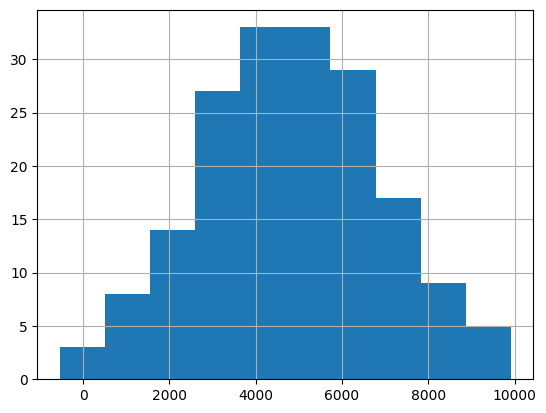

In [148]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()


### Probabilities from the normal distribution

Since each deal Amir worked on (both won and lost) was different, each
was worth a different amount of money. These values are stored in the
`amount` column of `amir_deals` and follow a normal distribution with a
mean of 5000 dollars and a standard deviation of 2000 dollars. As part
of his performance metrics, you want to calculate the probability of
Amir closing a deal worth various amounts.

`norm` from `scipy.stats` is imported as well as `pandas` as `pd`. The
DataFrame `amir_deals` is loaded.

**Instructions**

- What's the probability of Amir closing a deal worth less than \$7500?

<!-- -->

- What's the probability of Amir closing a deal worth more than \$1000?

<!-- -->

- What's the probability of Amir closing a deal worth between \$3000 and
  \$7000?

<!-- -->

- What amount will 25% of Amir's sales be *less than*?

**Answer**


In [149]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)


# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)


# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)


# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)


NameError: name 'norm' is not defined

### Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the
worth of each sale will increase by 20% and the volatility, or standard
deviation, of each sale's worth will increase by 30%. To see what Amir's
sales might look like next quarter under these new market conditions,
you'll simulate new sales amounts using the normal distribution and
store these in the `new_sales` DataFrame, which has already been created
for you.

In addition, `norm` from `scipy.stats`, `pandas` as `pd`, and
`matplotlib.pyplot` as `plt` are loaded.

**Instructions**

- Currently, Amir's average sale amount is \$5000. Calculate what his
  new average amount will be if it increases by 20% and store this in
  `new_mean`.
- Amir's current standard deviation is \$2000. Calculate what his new
  standard deviation will be if it increases by 30% and store this in
  `new_sd`.
- Create a variable called `new_sales`, which contains 36 simulated
  amounts from a normal distribution with a mean of `new_mean` and a
  standard deviation of `new_sd`.
- Plot the distribution of the `new_sales` `amount`s using a histogram
  and show the plot.

**Answer**


In [ ]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()


### The CLT in action

The central limit theorem states that a sampling distribution of a
sample statistic approaches the normal distribution as you take more
samples, no matter the original distribution being sampled from.

In this exercise, you'll focus on the sample mean and see the central
limit theorem in action while examining the `num_users` column of
`amir_deals` more closely, which contains the number of people who
intend to use the product Amir is selling.

`pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt` are
loaded and `amir_deals` is available.

**Instructions**

- Create a histogram of the `num_users` column of `amir_deals` and show
  the plot.
- Set the seed to `104`.
- Take a sample of size `20` with replacement from the `num_users` column of `amir_deals`, and take the mean.
- Repeat this 100 times using a `for` loop and store as `sample_means`. This will take 100 different samples and calculate the mean of each.
- Convert `sample_means` into a `pd.Series`, create a histogram of the `sample_means`, and show the plot.

**Answer**


In [ ]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()


# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))


# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)


# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()


### The mean of means

You want to know what the average number of users (`num_users`) is per
deal, but you want to know this number for the entire company so that
you can see if Amir's deals have more or fewer users than the company's
average deal. The problem is that over the past year, the company has
worked on more than ten thousand deals, so it's not realistic to compile
all the data. Instead, you'll estimate the mean by taking several random
samples of deals, since this is much easier than collecting data from
everyone in the company.

`amir_deals` is available and the user data for all the company's deals
is available in `all_deals`. Both `pandas` as `pd` and `numpy` as `np`
are loaded.

**Instructions**

- Set the random seed to `321`.
- Take 30 samples (with replacement) of size 20 from
  `all_deals['num_users']` and take the mean of each sample. Store the
  sample means in `sample_means`.
- Print the mean of `sample_means`.
- Print the mean of the `num_users` column of `amir_deals`.

**Answer**


In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))


### Tracking lead responses

Your company uses sales software to keep track of new sales leads. It
organizes them into a queue so that anyone can follow up on one when
they have a bit of free time. Since the number of lead responses is a
countable outcome over a period of time, this scenario corresponds to a
Poisson distribution. On average, Amir responds to 4 leads each day. In
this exercise, you'll calculate probabilities of Amir responding to
different numbers of leads.

**Instructions**

- Import `poisson` from `scipy.stats` and calculate the probability that
  Amir responds to 5 leads in a day, given that he responds to an
  average of 4.

<!-- -->

- Amir's coworker responds to an average of 5.5 leads per day. What is
  the probability that she answers 5 leads in a day?

<!-- -->

- What's the probability that Amir responds to 2 or fewer leads in a
  day?

<!-- -->

- What's the probability that Amir responds to more than 10 leads in a
  day?

**Answer**


In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)


# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)


# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)


# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)


### Modeling time between leads

To further evaluate Amir's performance, you want to know how much time
it takes him to respond to a lead after he opens it. On average, he
responds to 1 request every 2.5 hours. In this exercise, you'll
calculate probabilities of different amounts of time passing between
Amir receiving a lead and sending a response.

**Instructions**

- Import `expon` from `scipy.stats`. What's the probability it takes
  Amir less than an hour to respond to a lead?

<!-- -->

- What's the probability it takes Amir more than 4 hours to respond to a
  lead?

<!-- -->

- What's the probability it takes Amir 3-4 hours to respond to a lead?

**Answer**


In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))


# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))


# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))


## Correlation and Experimental Design

### Relationships between variables

In this chapter, you'll be working with a dataset `world_happiness`
containing results from the [2019 World Happiness
Report](https://worldhappiness.report/ed/2019/). The report scores
various countries based on how happy people in that country are. It also
ranks each country on various societal aspects such as social support,
freedom, corruption, and others. The dataset also includes the GDP per
capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's
life expectancy (`life_exp`) and happiness score (`happiness_score`)
both visually and quantitatively. `seaborn` as `sns`,
`matplotlib.pyplot` as `plt`, and `pandas` as `pd` are loaded and
`world_happiness` is available.

**Instructions**

- Create a scatterplot of `happiness_score` vs. `life_exp` (without a
  trendline) using `seaborn`.
- Show the plot.
- Create a scatterplot of `happiness_score` vs. `life_exp` **with a linear trendline** using `seaborn`, setting `ci` to `None`.
- Show the plot.
- Calculate the correlation between `life_exp` and `happiness_score`. Save this as `cor`.



**Answer**


In [ ]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()


# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()


# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)


### What can't correlation measure?

While the correlation coefficient is a convenient way to quantify the
strength of a relationship between two variables, it's far from perfect.
In this exercise, you'll explore one of the caveats of the correlation
coefficient by examining the relationship between a country's GDP per
capita (`gdp_per_cap`) and happiness score.

`pandas` as `pd`, `matplotlib.pyplot` as `plt`, and `seaborn` as `sns`
are imported, and `world_happiness` is loaded.

**Instructions**

- Create a `seaborn` scatterplot (without a trendline) showing the
  relationship between `gdp_per_cap` (on the x-axis) and `life_exp` (on
  the y-axis).
- Show the plot
- Calculate the correlation between `gdp_per_cap` and `life_exp` and store as `cor`.



**Answer**


In [ ]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()


# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)


### Transforming variables

When variables have skewed distributions, they often require a
transformation in order to form a linear relationship with another
variable so that correlation can be computed. In this exercise, you'll
perform a transformation yourself.

`pandas` as `pd`, `numpy` as `np`, `matplotlib.pyplot` as `plt`, and
`seaborn` as `sns` are imported, and `world_happiness` is loaded.

**Instructions**

- Create a scatterplot of `happiness_score` versus `gdp_per_cap` and
  calculate the correlation between them.

<!-- -->

- Add a new column to `world_happiness` called `log_gdp_per_cap` that
  contains the log of `gdp_per_cap`.
- Create a `seaborn` scatterplot of `happiness_score` versus
  `log_gdp_per_cap`.
- Calculate the correlation between `log_gdp_per_cap` and
  `happiness_score`.

**Answer**


In [ ]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)


# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)


### Does sugar improve happiness?

A new column has been added to `world_happiness` called
`grams_sugar_per_day`, which contains the average amount of sugar eaten
per person per day in each country. In this exercise, you'll examine the
effect of a country's average sugar consumption on its happiness score.

`pandas` as `pd`, `matplotlib.pyplot` as `plt`, and `seaborn` as `sns`
are imported, and `world_happiness` is loaded.

**Instructions**

- Create a `seaborn` scatterplot showing the relationship between
  `grams_sugar_per_day` (on the x-axis) and `happiness_score` (on the
  y-axis).
- Calculate the correlation between `grams_sugar_per_day` and
  `happiness_score`.

**Answer**


In [ ]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day', y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)
